# Predicción Univariada y Multivariada de los Principales Índices Financieros del Mundo

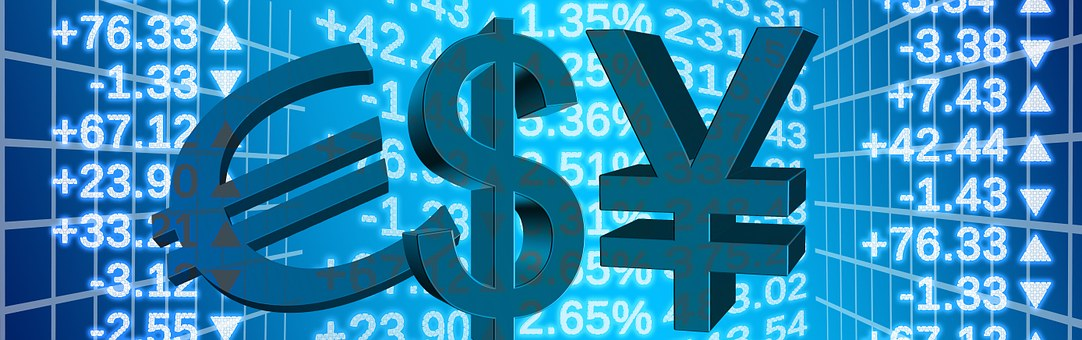

In [1]:
from IPython.display import Image
Image(filename='./img/imagenStock.jpg' ,  width= 1280)

# Trabajo Práctico N°2: Análisis Exploratorio y Curación de Datos

## Introducción

En este práctico se propone continuar con la exploración del dataset iniciada en el TP1. En lo desarrollado en el primer práctico pudimos notar algunas características propias de los datos de series temporales y en particular de los índices financieros. Algunas de ellas son que se trata de __series no estacionarias__, o sea que sus distribuciones cambian a través del tiempo y además sus trayectorias no son determinísticas sino que se trata de procesos con __raices unitarias__. __Tampoco se aprecian patrones de estacionalidad__. Lo antes descripto tiene __consecuencias__ directas en la selección de las metodologías adecuadas para abordar las problemáticas de tratamiento de __valores faltantes__, detección de __outliers__ y la construcción de __modelos predictivos y/o causales__.

Por otra parte, debe notarse que los índices son escencialmente promedios ponderados de los precios de los activos que los componen y a su vez que el precio de una acción sea mayor al de otra no significa directamente un mayor valor de la firma, dado que la cantidad de acciones emitidas por cada empresa no es la misma. Entonces, el análisis de este tipo de series se centra por lo general en el cambio porcentual de los precios en vez del cambio en los valores absolutos. Esto resulta en que en vez de modelar los índices originales, previamente se habitúa realizar una __transformación logarítmica__ o trabajar con la __tasa de rendimiento__. Además, los índices están expresados en distintas monedas, por lo que a la hora de comparar sus evoluciones o tasas de rendimiento es conveninete reexpresarlos en un __único signo monetario__ para evitar distorsiones debidas a los procesos inflacionarios, especialmente en el caso de las economías emergentes.

### Carga del dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 5)

In [3]:
df = pd.read_csv("./inputs/dataset.csv", index_col=0, parse_dates=True, dayfirst=True)

### Variables

- __FECHA__: se la usa como índice del _pandasDataFrame_.

#### Índices (Valores al cierre de cada día):

- __MERV__: Merval (Argentina). Expresado en pesos.
- __BVSPC__: Bovespa (Brasil). Expresado en reales.
- __GSPC__: Standard & Poors 500 (Estados Unidos). Expresado en dólares estadounidenses.
- __NDX__: Nasdaq 100 (Estados Unidos). Expresado en dólares americanos.
- __FTSE__: FTSE 100 (Reino Unido). Expresado en libras esterlinas.
- __GDAXI__: DAX 30 (Alemania). Expresado en euros.
- __FCHI__: CAC 40 (Francia). Expresado en euros.
- __N225__: Nikkei 225 (Japón). Expresado en yenes.
- __HSI__: Hang Seng (China). Expresado en dólares honkonenses.
- __SSEC__: Shanghai Composite (China). Expresado en yuanes.
- __BSESN__: Bombay Stock Exchange (India). Expresado en rupias indias.

#### Tipos de cambio:

- __DEXARUS__: cantidad de pesos necesarios para adquir un dólar estadounidense.
- __DEXBZUS__: cantidad de reales necesarios para adquir un dólar estadounidense.
- __DEXUSUK__: cantidad de dólares estadounidenses necesarios para adquir una libra esterlina.
- __DEXUSEU__: cantidad de dólares estadounidenses necesarios para adquir un euro.
- __DEXJPUS__: cantidad de yenes necesarios para adquir un dólar estadounidense.
- __DEXHKUS__: cantidad de dólares hongkonenses necesarios para adquir un dólar estadounidense.
- __DEXCHUS__: cantidad de yuanes chinos necesarios para adquirir un dólar estadounidense.
- __DOLAR_BLUE__: serie de dolar blue, que se puede usar para corregir __DEXARUS__ en épocas de cepo cambiario. Surge de la combinación de dos series, una para el período 28/10/2011 - 16/12/2015 y otra para el período 01/09/2019 - 08/05/2020.

# Consignas del trabajo práctico N°2

El objetivo general del práctico es realizar algunas tareas de __preprocesamiento__ de los datos y luego __analizar las series obtenidas__ de dicho preprocesamiento en forma similar a la empleada en el TP1.


## Fecha de entrega

- __Versión preliminar: 13/7__ 

- __Version final: 19/7__

## Condiciones de entrega

Realizar un informe en el cual se presenten los resultados y conclusiones del análisis realizado. El mismo debe estar pensado para un público técnico pero que desconoce los aspectos propios del problema a resolver tal como los compañeros de clase. Dicho informe puede ser un notebook, a condición de que en el mismo se efectúe un análisis escrito suficientemente detallado de los resultados. 


Se proponen las siguientes actividades orientadoras, sin perjuicio de que se puedan incorporar análisis adicionales:


#### Tratamiento de faltantes

- Eliminar los fines de semana.

In [4]:
df = df[df.index.dayofweek < 5]

- Imputar los faltantes debidos a feriados usando un algoritmo adecuado para series temporales, por ejemplo splines.


In [5]:
df = df.interpolate()

**Ver como tratar las columnas que empiezan con NaN como HSI y DOLAR_BLUE**

#### Expresión en moneda común:

- Construir una serie corregida para el tipo de cambio de Argentina. Para ello se deberá sobreescribir las cotizaciones oficiales con los valores del _DOLAR_BLUE_ en los períodos de cepo cambiario, o sea 28/10/2011 - 16/12/2015 y  01/09/2019 - 08/05/2020.

In [6]:
cepo_1 = (df.index >= '2011-10-28') & (df.index <= '2015-12-16')
cepo_2 = (df.index >= '2019-09-01') & (df.index <= '2020-05-08')
cepo = (cepo_1 | cepo_2)
df['DEXARUS'][cepo] = df['DOLAR_BLUE']

- Expresar todos los índices en dólares estadounidenses.

In [7]:
df_us = pd.DataFrame(index=df.index)
df_us['MERV'] = df['MERV'] / df['DEXARUS'] # Divido porque el par esta en X/US
df_us['BVSP'] = df['BVSP'] / df['DEXBZUS']
df_us['FTSE'] = df['FTSE'] * df['DEXUSUK'] # Multiplico porque el par esta en US/X
df_us['GDAXI'] = df['GDAXI'] * df['DEXUSEU']
df_us['FCHI'] = df['FCHI'] * df['DEXUSEU']
df_us['N225'] = df['N225'] / df['DEXJPUS']
df_us['HSI'] = df['HSI'] / df['DEXHKUS']
df_us['SSEC'] = df['SSEC'] / df['DEXCHUS']
# df_us['BSESNUS'] = df['BSESN'] / df['DEX?'] Falta el DEX de rupias indias? 

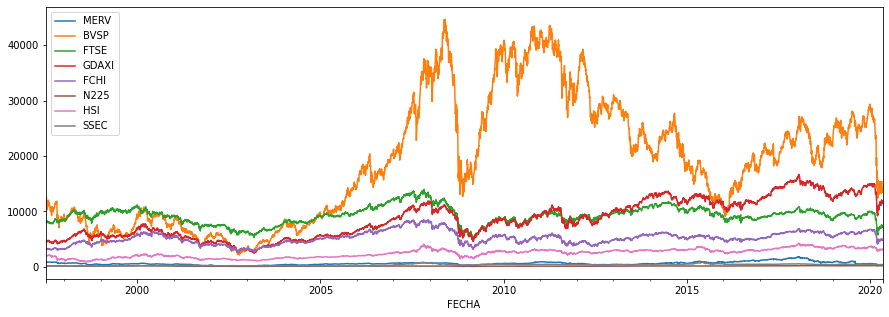

In [12]:
df_us.plot();

#### Transformaciones

Obtener las siguientes series transformadas:

- Los logaritmos naturales de los índices. 


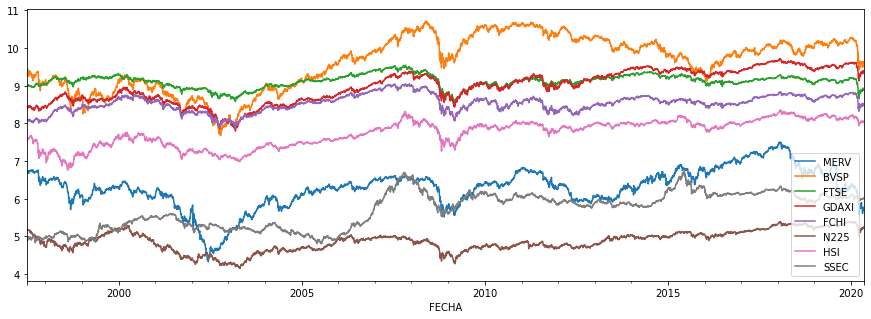

In [13]:
np.log(df_us).plot();

- Las tasas de rendimiento.

#### Exploración de las series transformadas

Reutilizar parte del código del TP1 para analizar las series transformadas. En una primera etapa se puede trabajar con solo una de las series resultantes de tomar logaritmo natural y una serie de tasa de rendimiento.

- Analizar las distribuciones por medio de gráficos y medidas de estadística descriptiva.


- Dichas distribuciones, ¿se mantienen relativamente inalteradas en el tiempo?


- ¿Hay outliers?


- Estudiar la evolución temporal de las series. ¿En qué sentido tienden a moverse? ¿Tienden a moverse en forma conjunta?  ¿Siempre se da dicho patrón? ¿Hay períodos de crisis? En caso de que existan crisis, ¿Son globales o propias de mercados individuales? 


#### Opcional

- Graficar e interpretar las funciones de autocorrelación (ACF) y autocorrelación parcial (PACF).


- Explorar la volatilidad de las series, por ejemplo graficando las desviaciones estándar móviles.
